# **Kaggle: Regression with an Abalone Dataset (Playground Series - Season 4, Episode 4)**

Start - 2024.04.01

Final - 2024.04.30

팀원: 19학번 배성민, 19학번 이형찬


# **[1. 개요]**
분석 목적: 전복 나이 예측

(Playground 라는 주최측에서 매달 데이터 사이언스의 역량과 기술을 향상시키기 위해 진행하는 대회 중 하나)

# **[2. 데이터 수집]**
**데이터 출처**: 대회에서 딥러닝으로 학습된 데이터를 제공합니다.

**수집 방법**: 위와 같습니다.

**수집된 데이터의 구조 및 특성 설명**

1) train, test, sample_submission csv파일로 총 3가지가 제공이 됩니다.

2) train 데이터 셋은 학습 및 검증용 데이터 셋으로 90,615행을 가집니다. / test 데이터 셋은 최종적으로 모델을 통해 예측을 해야 하는 데이터 셋으로 종속변수가 존재하지 않는 데이터 셋입니다. 총 60,411행을 가집니다. / sample_submission 파일은 test 데이터 셋을 예측한 결과를 예시로 보여주는 값들로 0~29까지의 수치로 나와있습니다.

3)변수 설명

ID - 각 전복에 대한 일련번호

Sex - 전복의 성별 (범주형 변수로 총 M,F,I로 나뉩니다.)

Length: 전복의 길이

Diameter: 전복의 지름

Height: 전복의 높이

Whole weight: 전복의 총 무게

Whole weight.1: 전복의 총 무게 (다른 측정 방법 또는 단위로 측정된 경우)

Whole weight.2: 전복의 총 무게 (다른 측정 방법 또는 단위로 측정된 경우)

Shell weight: 전복의 껍질 무게

Rings: 전복의 나이 (나이가 늘어날수록 껍질에 형성된 고리의 수 증가)

# **[3. 데이터 전처리]**

# 결측치 처리
(NULL값, NaN, 빈 칸 모두 없음)

# 이상치 확인

In [ ]:
def plot_boxplot(df, features):     # 함수 정의
    num_features = len(features)    # 변수들의 크기를 저장
    fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 15)) # 4행 2열 크기는 15, 15로 출력

    for i, feature in enumerate(features): # enumerate() 함수는 리스트의 각 항목에 대해 인덱스와 값을 제공
        row = i // 2                       # 인덱스 번호를 수식을 이용해 행을 지정
        col = i % 2                        # 인덱스 번호를 수식을 이용해 열을 지정
        ax = axes[row, col]                # 지정된 행과 열을 저장

        sns.boxplot(x = df[feature], ax = ax)       # df의 특정 변수이름 값으로 정해진 행과 열에 박스 플롯을 그림
        ax.set_title(f'Boxplot of {feature}', fontsize = 14) # ax에 저장된 행, 열에 있는 그래프에 제목을 넣어주기

    plt.tight_layout() # 서브플롯들의 간격을 조정
    plt.show()         # 출력

feature_names = ["Length", "Diameter", "Height", "Whole weight", "Whole weight.1", "Whole weight.2", "Shell weight"]
print("-----------------------------------train data-----------------------------------")
print("\n")
plot_boxplot(train_data, feature_names)
print("\n")
print("-----------------------------------test_data-----------------------------------")
print("\n")
plot_boxplot(test_data, feature_names)

**---------------------------------------------train_data-----------------------------------------------**
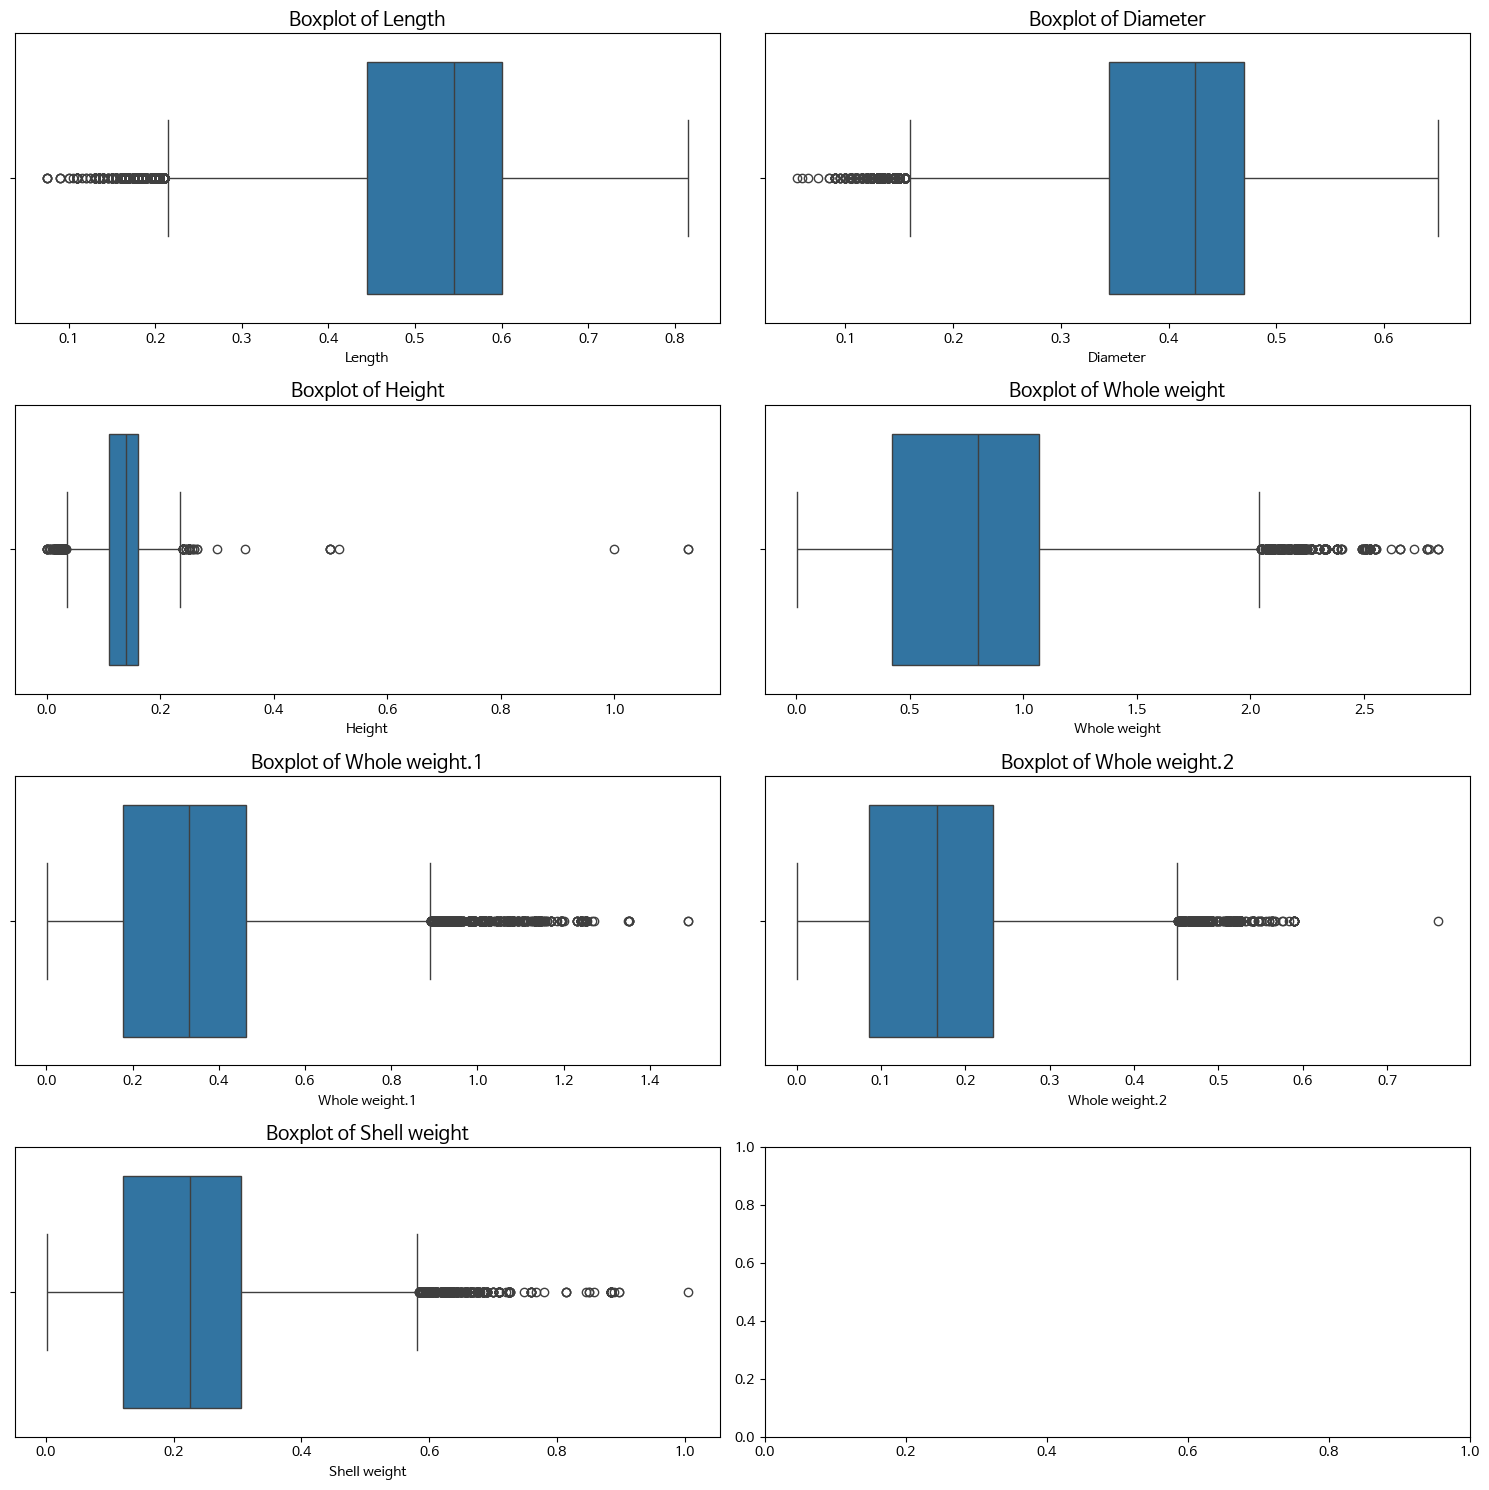

**---------------------------------------------test_data-----------------------------------------------**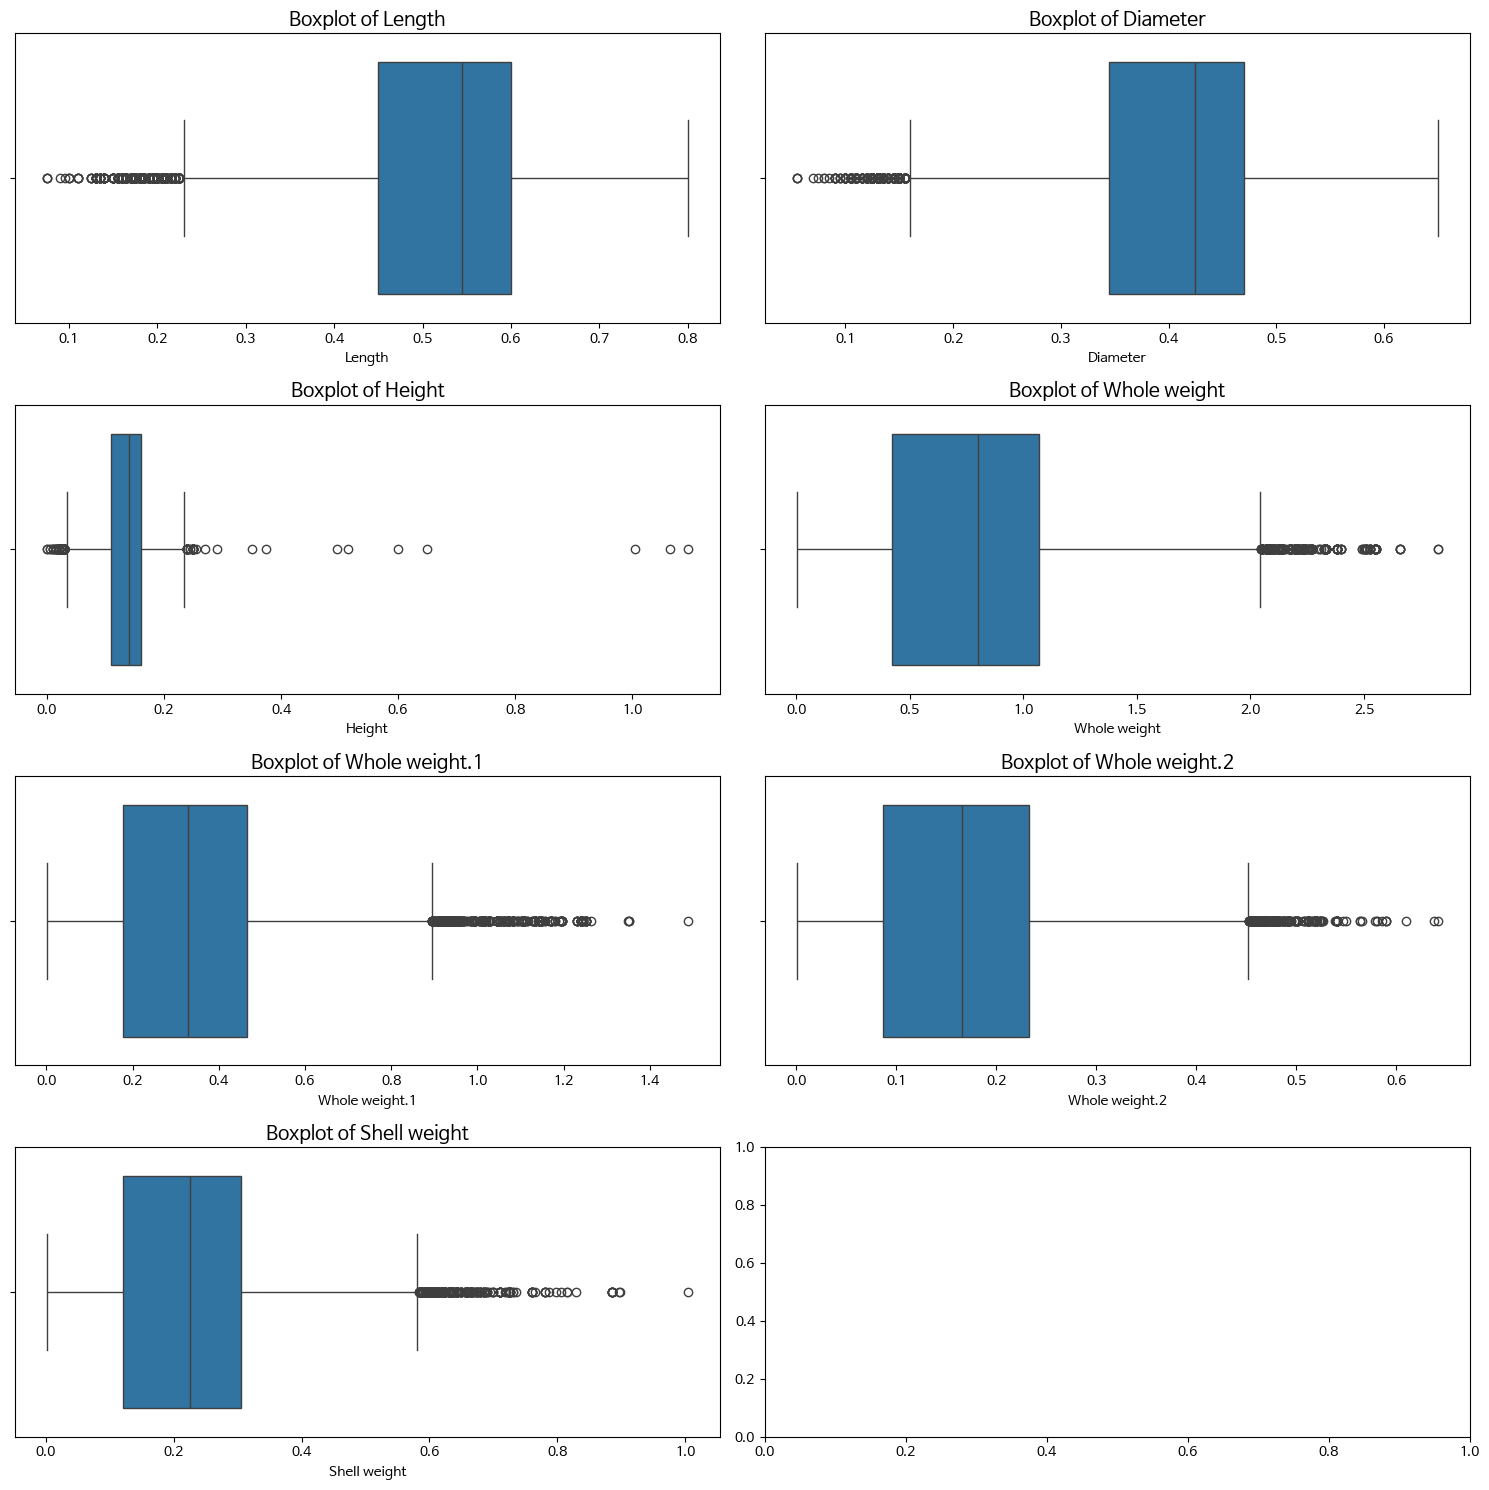


# **이상치 제거**
Q3 = 75%

Q2 = 50%

Q1 = 25%

IQR =  Q3 - Q1

lower_bound = Q1 - IQR * 1.5

upper_bound = Q3 + IQR * 1.5

All_data - All_data < lower_bound

All_data - All_data > upper_data

이상치를 평균값으로 대체

In [ ]:
# 이상치 처리를 위해 test와 train 데이터 셋 합치기
All_data = pd.concat([train_data, test_data], axis = 0)

# 성별 변수에서 M과 F 모두 Adult로 바꿔주기
All_data["Sex"] = All_data["Sex"].replace({"M": "Adult", "F": "Adult"})

In [ ]:
# 각 수치형 변수별 1사분위수와 3사분위수 구하기
Length_Q1 = All_data.groupby('Sex')['Length'].transform(lambda x: x.quantile(0.25))
Length_Q3 = All_data.groupby('Sex')['Length'].transform(lambda x: x.quantile(0.75))

Diameter_Q1 = All_data.groupby('Sex')['Diameter'].transform(lambda x: x.quantile(0.25))
Diameter_Q3 = All_data.groupby('Sex')['Diameter'].transform(lambda x: x.quantile(0.75))

Height_Q1 = All_data.groupby('Sex')['Height'].transform(lambda x: x.quantile(0.25))
Height_Q3 = All_data.groupby('Sex')['Height'].transform(lambda x: x.quantile(0.75))

Whole_weight_Q1 = All_data.groupby('Sex')['Whole weight'].transform(lambda x: x.quantile(0.25))
Whole_weight_Q3 = All_data.groupby('Sex')['Whole weight'].transform(lambda x: x.quantile(0.75))

Shell_weight_Q1 = All_data.groupby('Sex')['Shell weight'].transform(lambda x: x.quantile(0.25))
Shell_weight_Q3 = All_data.groupby('Sex')['Shell weight'].transform(lambda x: x.quantile(0.75))


# 각 수치형 변수별 IQR값 구하기
Length_IQR = Length_Q3 - Length_Q1
Diameter_IQR = Diameter_Q3 - Diameter_Q1
Height_IQR = Height_Q3 - Height_Q1
Whole_weight_IQR = Whole_weight_Q3 - Whole_weight_Q1
Shell_weight_IQR = Shell_weight_Q3 - Shell_weight_Q1


# 각 수치형 변수별 이상치 범위 위, 아래로 구하기
Length_lower_bound = Length_Q1 - Length_IQR * 1.5
Length_upper_bound = Length_Q3 + Length_IQR * 1.5

Diameter_lower_bound = Diameter_Q1 - Diameter_IQR * 1.5
Diameter_upper_bound = Diameter_Q3 + Diameter_IQR * 1.5

Height_lower_bound = Height_Q1 - Height_IQR * 1.5
Height_upper_bound = Height_Q3 + Height_IQR * 1.5

Whole_weight_lower_bound = Whole_weight_Q1 - Whole_weight_IQR * 1.5
Whole_weight_upper_bound = Whole_weight_Q3 + Whole_weight_IQR * 1.5

Shell_weight_lower_bound = Shell_weight_Q1 - Shell_weight_IQR * 1.5
Shell_weight_upper_bound = Shell_weight_Q3 + Shell_weight_IQR * 1.5

# Length열 이상치 제거
All_data["Length"] = np.where((All_data["Length"] < Length_lower_bound) |
                              (All_data["Length"] > Length_upper_bound),
                              All_data.groupby("Sex")["Length"].transform('median'), All_data["Length"])

# Diameter열 이상치 제거
All_data["Diameter"] = np.where((All_data["Diameter"] < Diameter_lower_bound) |
                              (All_data["Diameter"] > Diameter_upper_bound),
                              All_data.groupby("Sex")["Diameter"].transform('median'), All_data["Diameter"])

# Height열 이상치 제거
All_data["Height"] = np.where((All_data["Height"] < Height_lower_bound) |
                              (All_data["Height"] > Height_upper_bound),
                              All_data.groupby("Sex")["Height"].transform('median'), All_data["Height"])

# Whole weight열 이상치 제거
All_data["Whole weight"] = np.where((All_data["Whole weight"] < Whole_weight_lower_bound) |
                              (All_data["Whole weight"] > Whole_weight_upper_bound),
                              All_data.groupby("Sex")["Whole weight"].transform('median'), All_data["Whole weight"])

# Diameter열 이상치 제거
All_data["Shell weight"] = np.where((All_data["Shell weight"] < Shell_weight_lower_bound) |
                              (All_data["Shell weight"] > Shell_weight_upper_bound),
                              All_data.groupby("Sex")["Shell weight"].transform('median'), All_data["Shell weight"])

# **이상치 제거 확인**

In [ ]:
def plot_boxplot2(df, features):     # 함수 정의
    num_features = len(features)    # 변수들의 크기를 저장
    fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 15)) # 4행 2열 크기는 15, 15로 출력

    for i, feature in enumerate(features): # enumerate() 함수는 리스트의 각 항목에 대해 인덱스와 값을 제공
        row = i // 2                       # 인덱스 번호를 수식을 이용해 행을 지정
        col = i % 2                        # 인덱스 번호를 수식을 이용해 열을 지정
        ax = axes[row, col]                # 지정된 행과 열을 저장

        sns.boxplot(x = "Sex", y = feature, hue = "Sex", data = df, ax = ax)  # df의 특정 변수이름 값으로 정해진 행과 열에 박스 플롯을 그림

    plt.tight_layout() # 서브플롯들의 간격을 조정
    plt.show()         # 출력

feature_names = ["Length", "Diameter", "Height", "Whole weight", "Shell weight"]
plot_boxplot2(All_data, feature_names)

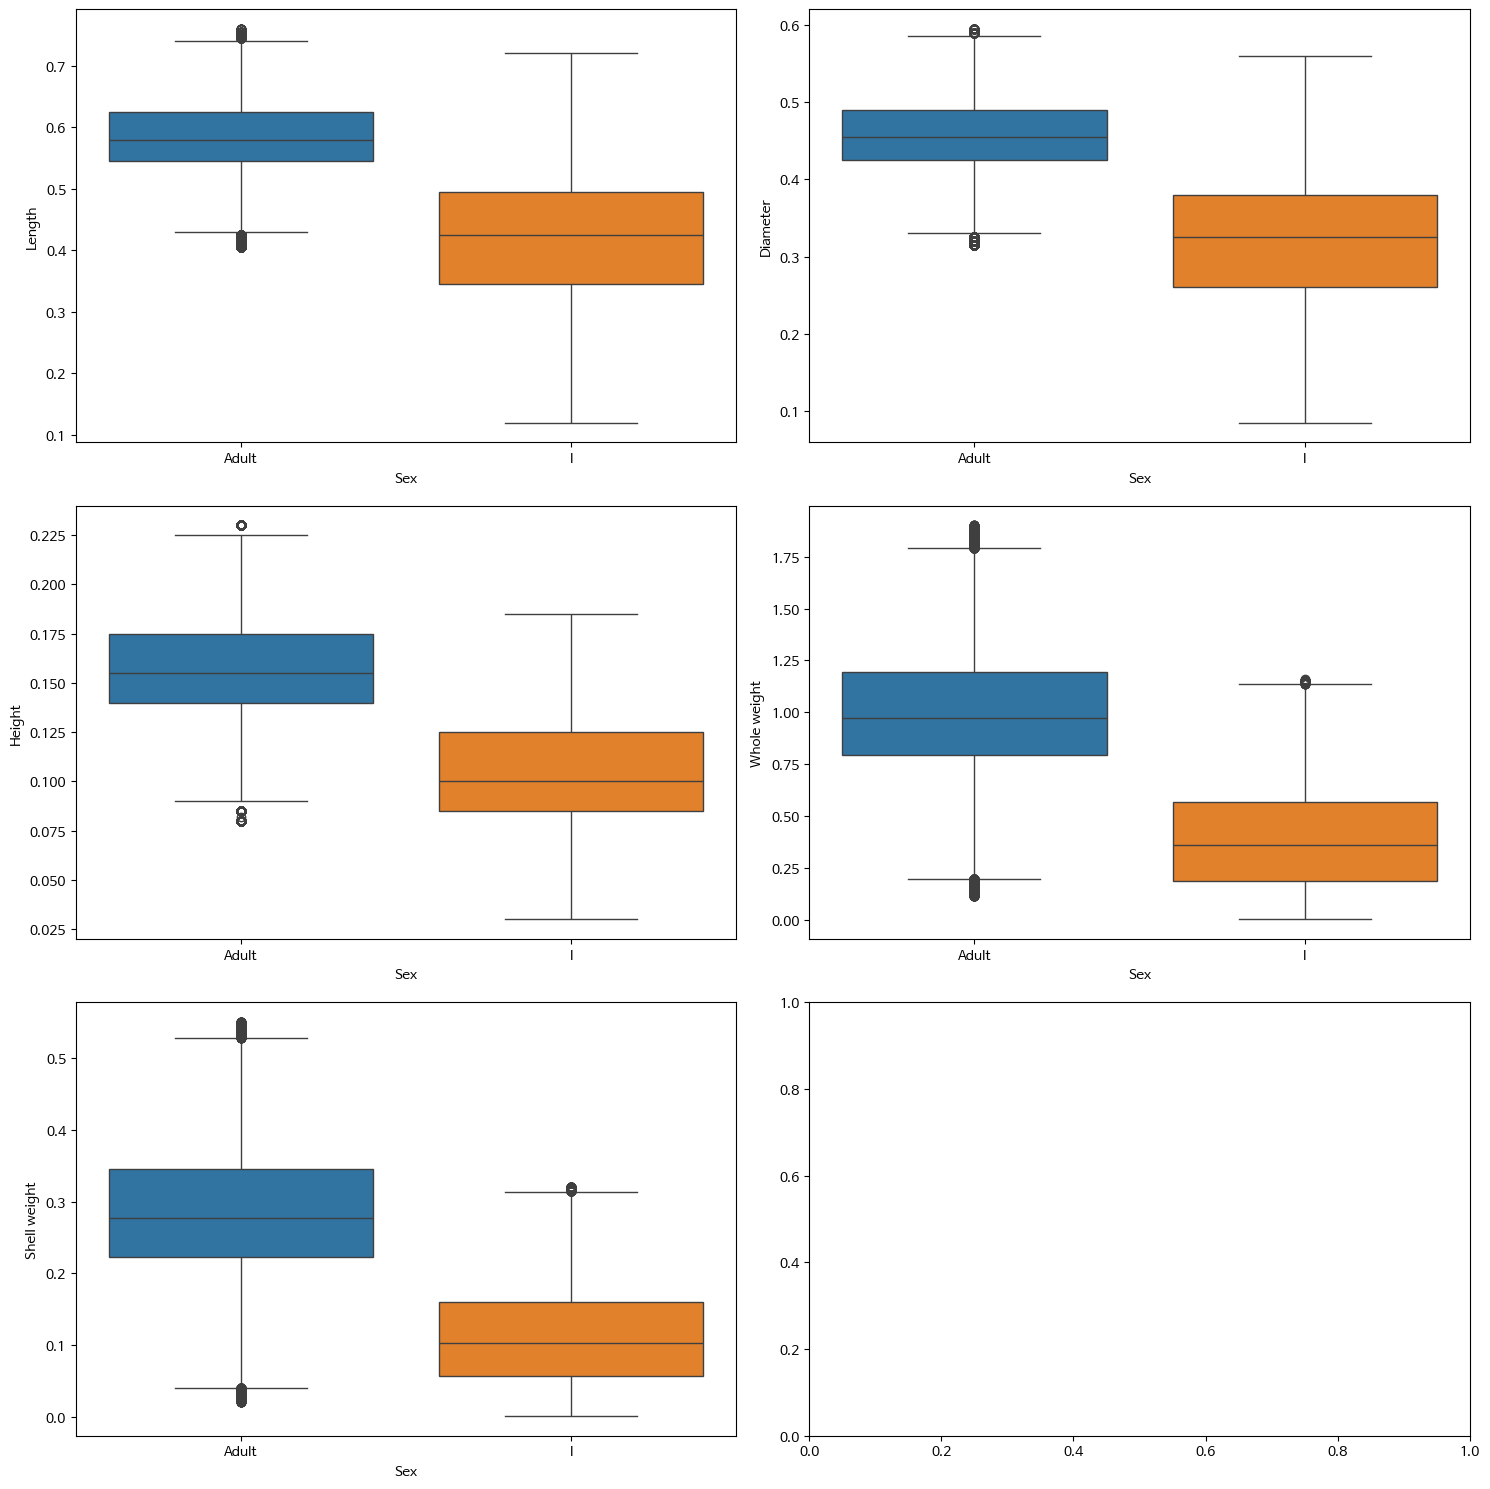

# **데이터 표준화**

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(All_data.iloc[:, 2:9])
df_scaled = pd.DataFrame(data = data_scaled, columns=All_data.columns[2:9])
df_scaled.describe().T

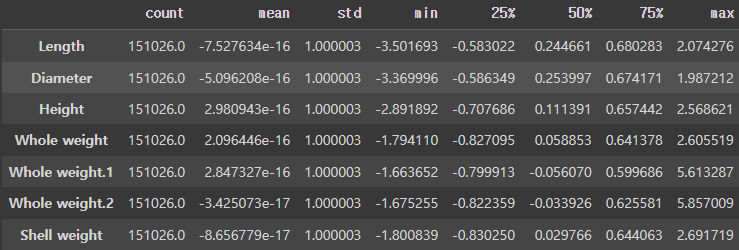

# **표준화 결과 시각화**

In [ ]:
plt.plot(range(1, 151027), All_data.loc[:, "Length"].sort_values(ascending=True)) # 표준화 하기 전
plt.plot(range(1, 151027), df_scaled.loc[:, "Length"].sort_values(ascending=True), 'red')
plt.plot(range(1, 151027), df_scaled.loc[:, "Diameter"].sort_values(ascending=True), 'green')
plt.plot(range(1, 151027), df_scaled.loc[:, "Height"].sort_values(ascending=True), 'black')
plt.plot(range(1, 151027), df_scaled.loc[:, "Whole weight"].sort_values(ascending=True), 'orange')
plt.show()

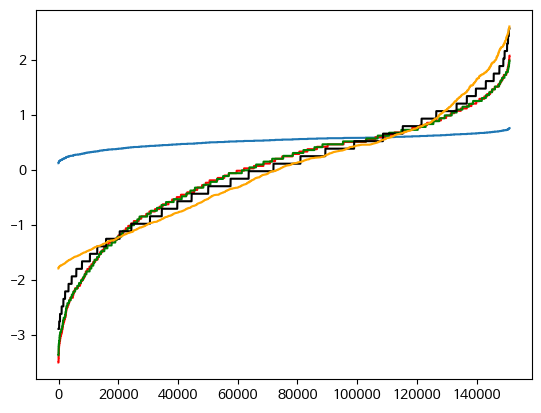

평균 0, 표준편차 1로 잘 스케일링된 것을 확인할 수 있습니다.

# **데이터 정규화**

In [ ]:
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(All_data.iloc[:, 2:9])
scaled = pd.DataFrame(data = data_scaled, columns = All_data.columns[2:9])
scaled.describe().T

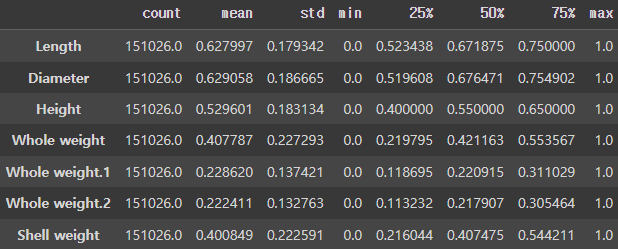

# **정규화 결과 시각화**

In [ ]:
plt.plot(range(1, 151027), All_data.loc[:, "Length"].sort_values(ascending=True)) # 정규화 전
plt.plot(range(1, 151027), scaled.loc[:, "Length"].sort_values(ascending=True), 'r')
plt.plot(range(1, 151027), scaled.loc[:, "Diameter"].sort_values(ascending=True), 'green')
plt.plot(range(1, 151027), scaled.loc[:, "Height"].sort_values(ascending=True), 'black')
plt.plot(range(1, 151027), scaled.loc[:, "Whole weight"].sort_values(ascending=True), 'orange')
plt.plot(range(1, 151027), scaled.loc[:, "Shell weight"].sort_values(ascending=True), 'purple')

plt.show()

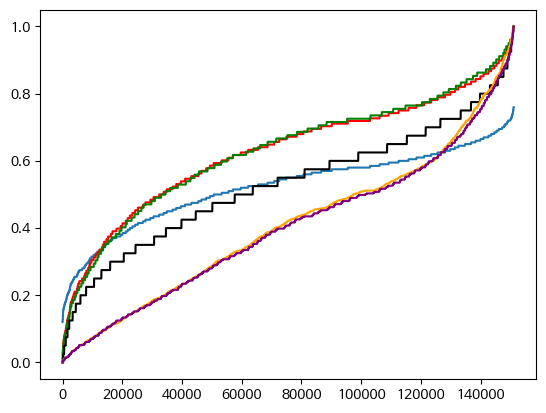

데이터들이 0과 1사이로 잘 스케일링된 것을 확인할 수 있습니다.

# **[4. 데이터 탐색 및 시각화]**

# **기술통계 분석**

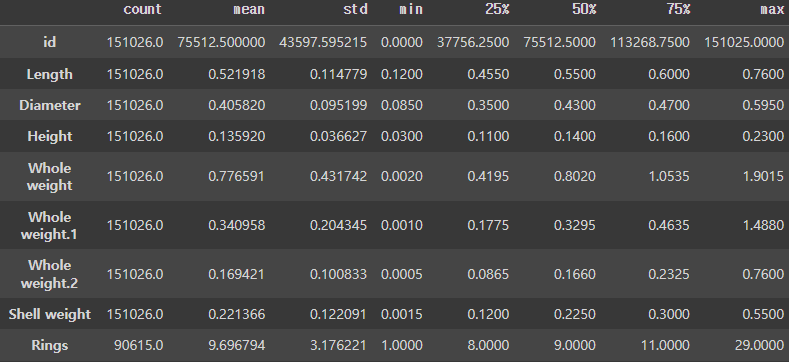

정규화 / 표준화 하기 전의 기술통계량으로 종속변수인 Rings를 보면 가장 어린 나이 1부터 가장 많은 나이 29까지 있는 것을 확인할 수 있습니다.

# **데이터 분포 확인**

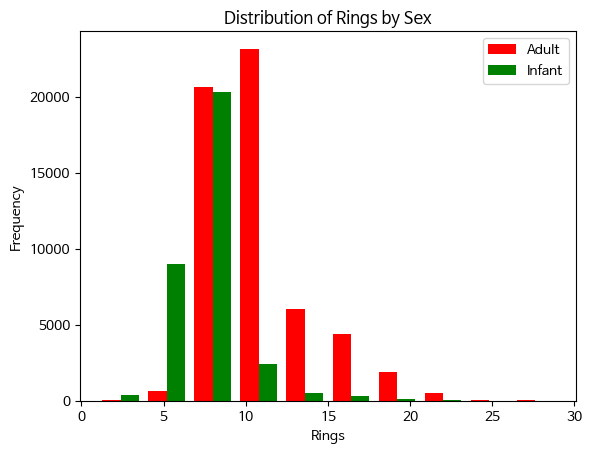

Infant는 아직 다 크지 않은 어린 전복으로 성체와 새끼의 나이 분포를 확인한 결과 10이상부터는 성체가 확연히 많은 걸 볼 수 있습니다.

# **상관관계 분석**
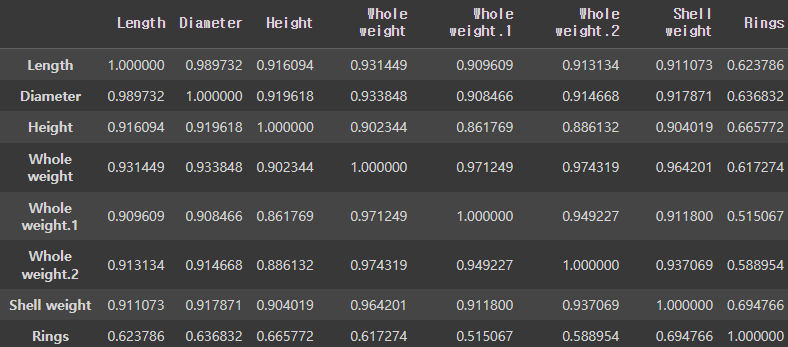

# **시각화**
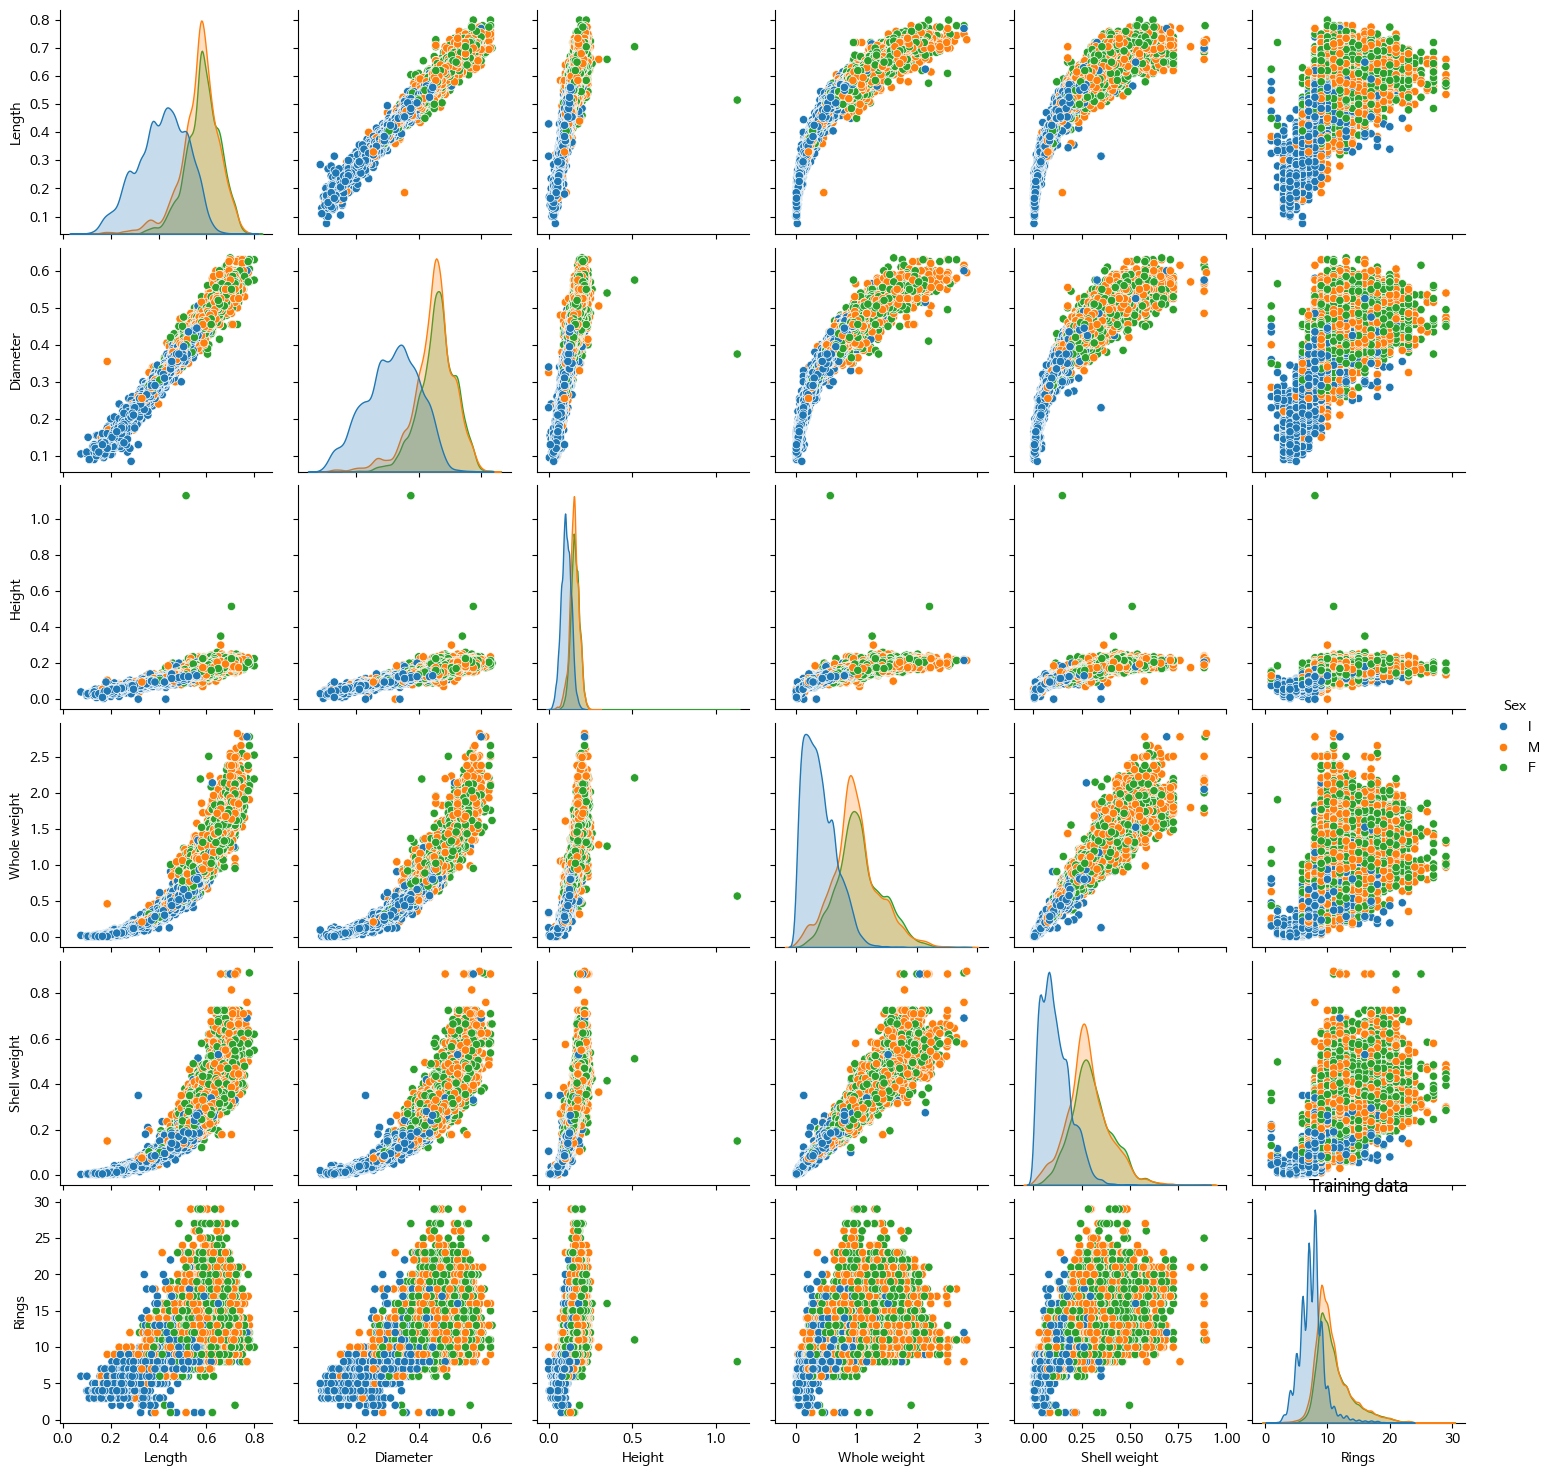

# **[최종]**

변수들의 상관계수와 시각화 결과를 토대로 중요 변수와 필요 없는 변수를 제거 및 차원축소를 시켜 모델에 적합시킬 예정입니다. 그리고 독립변수들 간의 다중공선성 또한 고려해야 할 요소이기 때문에 독립변수 간의 상관성도 확인할 예정입니다.